# Image Compression:

- Extract the image and cluster based on allowed number of colours
- Return the colours and pixel with count
- Return shape of original image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img,load_img,save_img

In [4]:
original_img=load_img('./Testfile.jpg')

In [5]:
X_img=np.array(img_to_array(original_img),dtype=int)

In [6]:
original_shape=X_img.shape
original_shape

(667, 1000, 3)

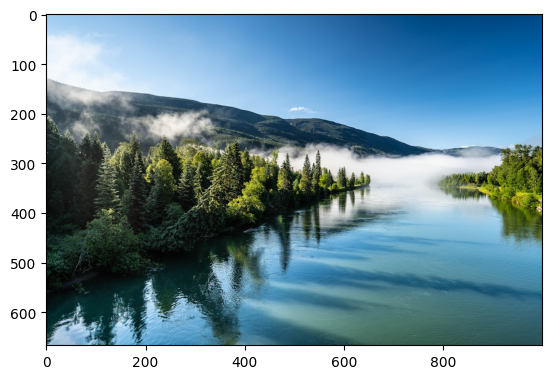

In [7]:
plt.imshow(X_img)

In [8]:
X_img=X_img.reshape(-1,3)
X_img.shape

(667000, 3)

# Finding closest centroids:

In [9]:
def closest_centroids(X,centroids):
  m,n=X.shape
  k=centroids.shape[0]
  idx=np.zeros(m,dtype=int)
  for i in range(m):
    dist_i=np.sum((X[i]-centroids)**2,axis=1)
    idx[i]=np.argmin(dist_i)
  return idx

# Computing Centroids:

In [10]:
def compute_centroids(X,idx,K):
  m,n=X.shape
  centroids=np.zeros((K,n),dtype=int)
  for j in range(K):
    X_j=X[np.where(idx==j)]
    centroids[j]=np.sum(X_j,axis=0)/len(X_j)
  return centroids

# Running K-Means:

In [11]:
def run_Kmeans(X,initial_centroids,max_iter=10):
  m,n=X.shape
  K=initial_centroids.shape[0]
  centroids=initial_centroids
  previous_centroids=initial_centroids
  for i in range(max_iter):
    print(f"Iteration:{i}/{max_iter-1}")
    idx=closest_centroids(X,centroids)
    centroids=compute_centroids(X,idx,K)
  return centroids,idx

# Randomized initial centroids:

In [12]:
def get_initial_centroids(X,K):
  randidx=np.random.permutation(X.shape[0])
  centroids=X[randidx[:K]]
  return centroids

# Distortion/Cost function:

In [13]:
def distortion_cost_sqr(X,centroids,idx):
  m,n=X.shape
  K=len(centroids)
  J=0.
  for j in range(K):
    J_j=np.sum((X[np.where(idx==j)]-centroids[j])**2)
    J+=J_j
  return J/m

# Training Loop:

In [14]:
K=1000
max_iter=10
no_samples=3

centroids_list=[]
idx_list=[]

for i in range(no_samples):
  print(f"Training model {i}...")
  initial_centroids=get_initial_centroids(X_img,K)
  centroids_i,idx_i=run_Kmeans(X_img,initial_centroids,max_iter)
  centroids_list.append(centroids_i)
  idx_list.append(idx_i)
  print()

Training model 0...
Iteration:0/9


C:\Users\Sagar\AppData\Local\Temp\ipykernel_7656\2536301531.py:6: RuntimeWarning: invalid value encountered in divide
  centroids[j]=np.sum(X_j,axis=0)/len(X_j)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_7656\2536301531.py:6: RuntimeWarning: invalid value encountered in cast
  centroids[j]=np.sum(X_j,axis=0)/len(X_j)


Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 1...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 2...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9



Choice:1 J_cost:16.469749625187408


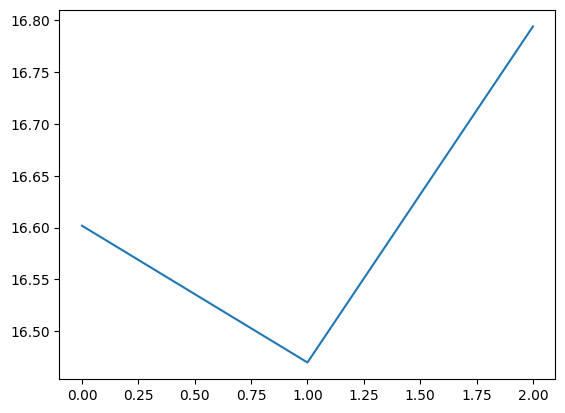

In [15]:
J_cost=[]

for i in range(no_samples):
  J_cost_i=distortion_cost_sqr(X_img,centroids_list[i],idx_list[i])
  J_cost.append(J_cost_i)

J_cost=np.array(J_cost)
choice=np.argmin(J_cost)
centroids,idx=centroids_list[choice],idx_list[choice]

plt.plot(range(no_samples),J_cost)

print(f"Choice:{choice} J_cost:{J_cost[choice]}")

In [16]:
X_recovered=centroids[idx,:]
X_recovered=np.reshape(X_recovered,original_shape).astype(int)
X_recovered.shape

(667, 1000, 3)

Text(0.5, 1.0, 'Compressed')

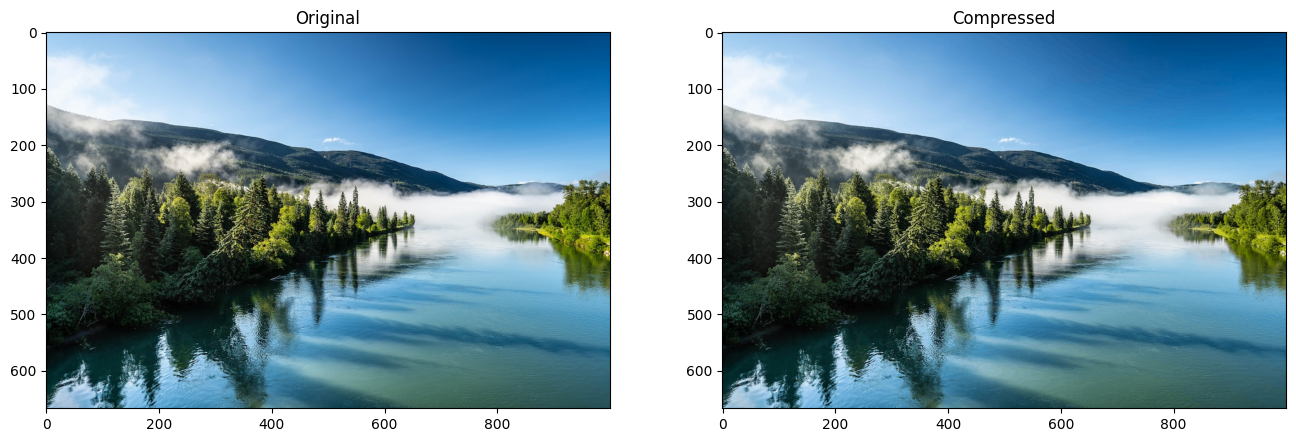

In [17]:
fig,ax=plt.subplots(1,2,figsize=(16,16))

ax[0].imshow(X_img.reshape(original_shape))
ax[0].set_title('Original')

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed')

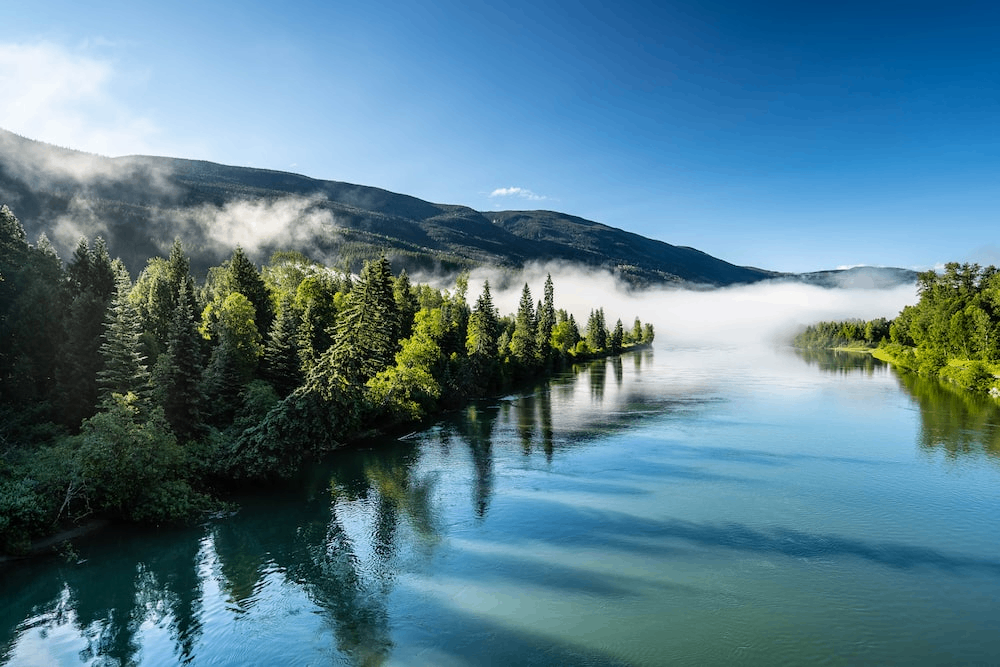

In [18]:
compressed_img=array_to_img(X_recovered)
compressed_img

In [19]:
save_img(path='./TestFile_comp_x.jpg',x=compressed_img)